Form des Datensatzes (Zeilen, Spalten): (1987, 10)


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,993.000000,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,573.741812,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,0.000000,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,496.500000,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,993.000000,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,1489.500000,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


>>> Tabelle 1: Feature-Übersicht (Bedeutung & Skalenniveau)


,Feature,Bedeutung,Datentyp (ungefähr),Skalenniveau
0,Age,Alter der Person,numerisch (int),metrisch / Verhältnis
1,EmploymentType,"Art der Beschäftigung (z.B. Government, Privat...",kategorisch (string),nominal
2,GraduateOrNot,Hochschulabschluss (Yes/No),kategorisch (string/binary),nominal (dichotom)
3,AnnualIncome,Jahreseinkommen,numerisch (int),metrisch / Verhältnis
4,FamilyMembers,Anzahl der Familienmitglieder,numerisch (int),metrisch / diskret
5,ChronicDiseases,Chronische Erkrankung vorhanden (0/1),numerisch (0/1),nominal (dichotom)
6,FrequentFlyer,Vielflieger (Yes/No oder 0/1),kategorisch (string/binary),nominal (dichotom)
7,EverTravelledAbroad,Schon im Ausland gereist (Yes/No oder 0/1),kategorisch (string/binary),nominal (dichotom)
8,TravelInsurance,Reiseversicherung abgeschlossen (0/1) – Zielva...,numerisch (0/1),nominal (dichotom)


>>> Tabelle 2: Relevanz der Merkmale für die Fragestellung


,Feature,Rolle,Relevanz (subjektiv),Begründung
0,Age,Prädiktor,mittel,Risikobewusstsein könnte mit dem Alter steigen.
1,EmploymentType,Prädiktor,unklar,Art der Beschäftigung könnte Reiseverhalten be...
2,GraduateOrNot,Prädiktor,mittel,Bildung hängt evtl. mit Einkommen & Informatio...
3,AnnualIncome,Prädiktor,hoch,Versicherung kostet Geld → Einkommen spielt ve...
4,FamilyMembers,Prädiktor,unklar,Mehr Familienmitglieder könnten höheren Absich...
5,ChronicDiseases,Prädiktor,hoch,Vorerkrankungen erhöhen das gesundheitliche Ri...
6,FrequentFlyer,Prädiktor,hoch,Vielflieger haben mehr Reisen → höherer Bedarf...
7,EverTravelledAbroad,Prädiktor,mittel,"Wer schon im Ausland war, kennt Risiken besser."
8,TravelInsurance,Zielvariable,Ziel,Ob die Versicherung abgeschlossen wurde (0/1).


>>> Datentypen nach Kodierung für Korrelationen:


/var/folders/0t/v6_tqm092rdf5whnsm78n0th0000gn/T/ipykernel_64205/801455657.py:133: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0})
/var/folders/0t/v6_tqm092rdf5whnsm78n0th0000gn/T/ipykernel_64205/801455657.py:133: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0})
/var/folders/0t/v6_tqm092rdf5whnsm78n0th0000gn/T/ipykernel_64205/801455657.py:133: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot           int64
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer           int64
EverTravelledAbroad     int64
TravelInsurance         int64
dtype: object

Numerische Spalten: ['Age', 'AnnualIncome', 'FamilyMembers']
Binäre Spalten: ['ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'GraduateOrNot', 'TravelInsurance']

>>> Pearson-Korrelation (metrisch <-> metrisch)


,Age,AnnualIncome,FamilyMembers
Age,1.000000,-0.020101,0.027409
AnnualIncome,-0.020101,1.000000,-0.015367
FamilyMembers,0.027409,-0.015367,1.000000


>>> Korrelation Zielvariable mit numerischen Merkmalen

Korrelation zwischen Age und TravelInsurance: r = 0.061, p = 0.0065
Korrelation zwischen AnnualIncome und TravelInsurance: r = 0.397, p = 0.0000
Korrelation zwischen FamilyMembers und TravelInsurance: r = 0.080, p = 0.0004

>>> Korrelation Zielvariable mit binären Merkmalen

Korrelation zwischen ChronicDiseases und TravelInsurance: r = 0.018, p = 0.4177
Korrelation zwischen FrequentFlyer und TravelInsurance: r = 0.232, p = 0.0000
Korrelation zwischen EverTravelledAbroad und TravelInsurance: r = 0.433, p = 0.0000
Korrelation zwischen GraduateOrNot und TravelInsurance: r = 0.019, p = 0.3989


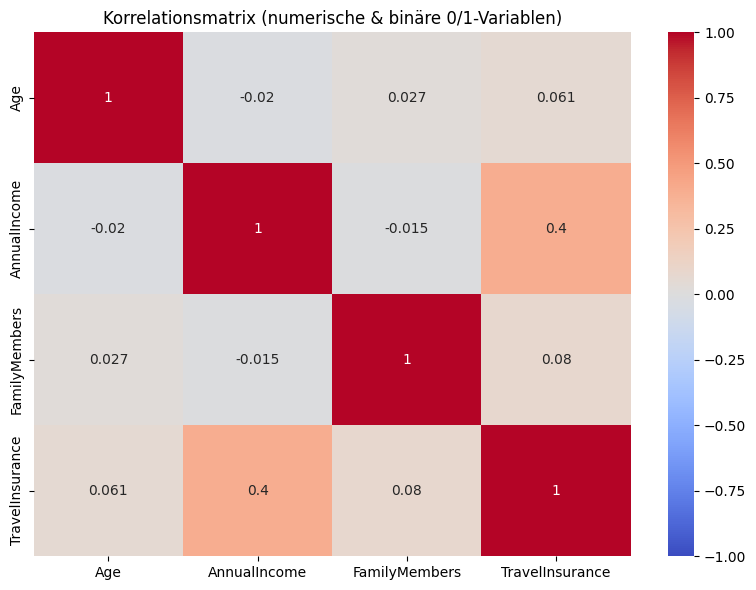

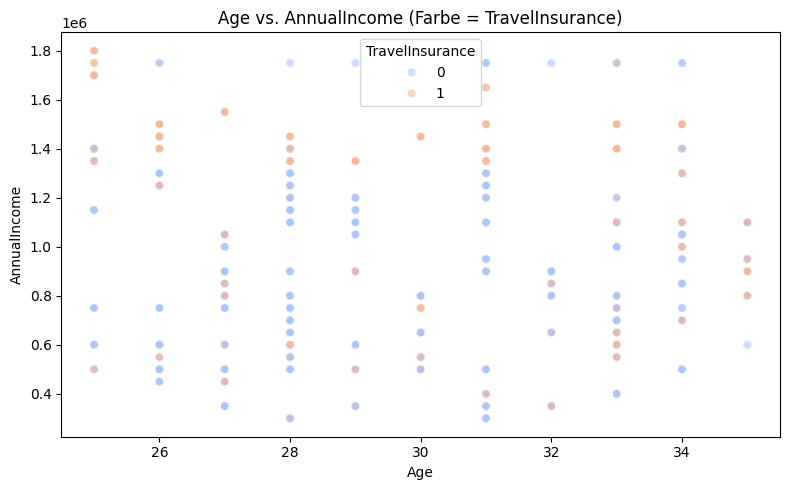

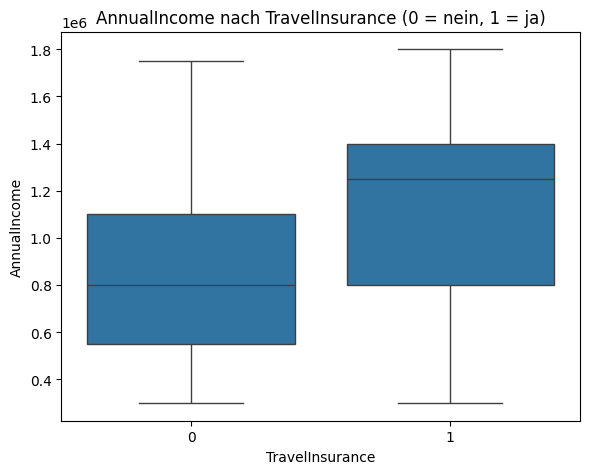